# Linear Models Practice

Imagine that you are a consultant that is helping a client predict market value for housing based on different characteristics.

The housing data used in this example is taken from [here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv)

In [1]:
# import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore') #ignoring some deprication warnings

## Load and prepare the data

In [3]:
# Load the training data and view the first few rows
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# print the shape of the dataset
data.shape

(1460, 81)

In [5]:
# Check the data types for each column and if there are any missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

For now, we don't know how to deal with object (string) columns, so we will remove them.

In [6]:
data = data.select_dtypes(exclude=['object'])
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [7]:
# Fill in missing values with the average of the column and remove ID column
data = data.drop(columns=['Id'])
data = data.fillna(data.mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1460 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [8]:
# Look at basic statistics for the data
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<Axes: >

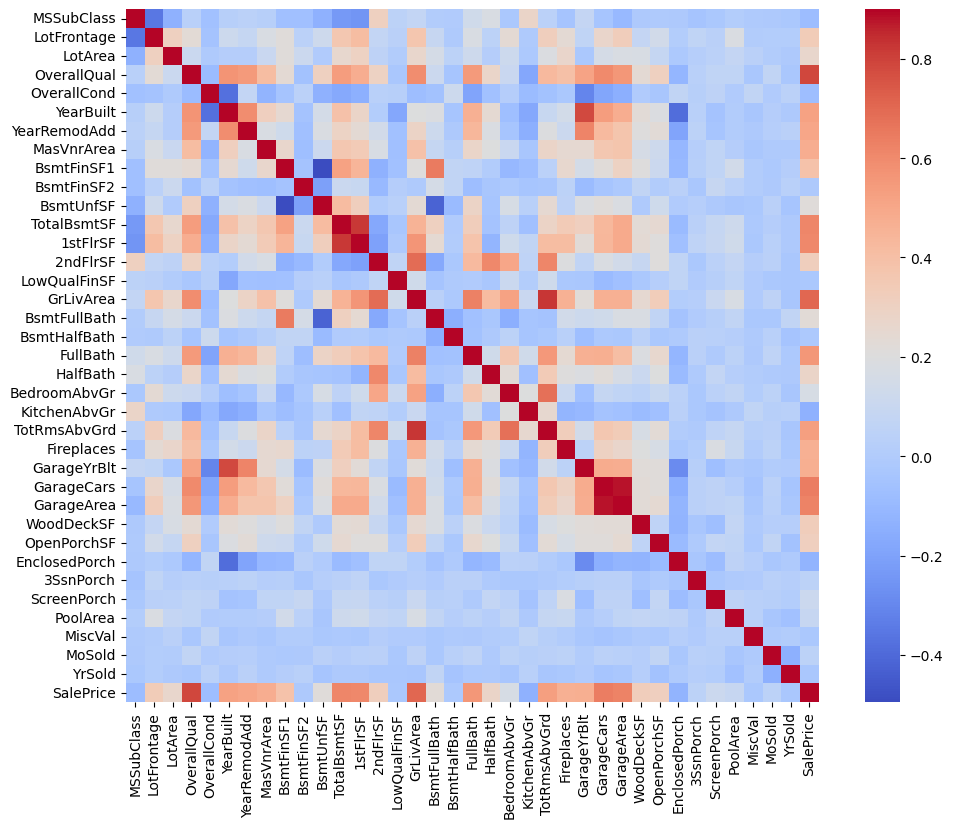

In [9]:
# look at the correlation of columns with .corr()
corrmat = data.corr()

# plot the correlations with sns.heatmap
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True, cmap='coolwarm')

Are there any features that are highly correlated with each other? Do they give the same information to the model?

What features are highly correlated with the `SalePrice`?

### Create feature matrix and target vector 

In [10]:
X_train = data.drop(columns='SalePrice')
y_train = data['SalePrice']
print(X_train.shape)
print(y_train.shape)

(1460, 36)
(1460,)


## Apply `LinearRegression()` and evaluate the performance

In [11]:
# Set up linear regression model object
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [12]:
# Implement cross_validate to get R^2 score
# Hint: set scoring='r2'
from sklearn.model_selection import cross_validate
scores = cross_validate(model, X_train, y_train, cv=5, 
                        scoring='r2',
                       return_train_score=True)
scores

{'fit_time': array([0.08369851, 0.01224327, 0.02217841, 0.01565218, 0.01560831]),
 'score_time': array([0.00641251, 0.01451159, 0.        , 0.        , 0.        ]),
 'test_score': array([0.84562128, 0.81363153, 0.8224597 , 0.81752751, 0.62961761]),
 'train_score': array([0.80411142, 0.81137629, 0.80631453, 0.81044931, 0.84880994])}

In [13]:
# Use code from example to print average scores
for label_pair in [ ('train_score', 'train_score'), ('test_score', 'validation_score')]:
    print('{}= {:.3f}'.format(label_pair[1], scores[label_pair[0]].mean()))

train_score= 0.816
validation_score= 0.786


**Note**: the test data on the website does not include labels (as this data is from a Kaggle competition), so we cannot check the testing accuracy

### How to find the model coefficients and intercept?

In [14]:
# Print the model coefficients and intercept
# Hint: you will need to train the model before you can find the coefficients
model.fit(X_train, y_train)
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

Model coefficients: [-1.81594373e+02 -5.62298852e+01  4.30013543e-01  1.73238404e+04
  4.66487499e+03  2.71650370e+02  1.36078034e+02  3.14639298e+01
  1.00008569e+01 -9.14863864e-01  1.13236609e-01  9.19922961e+00
  1.80582933e+01  1.81015663e+01 -5.26817412e+00  3.08916854e+01
  9.35912950e+03  2.03772192e+03  3.44826880e+03 -1.89958357e+03
 -1.00959951e+04 -1.22096934e+04  5.06341326e+03  3.96643044e+03
  1.21154692e+02  1.12346410e+04 -4.23646789e+00  2.40215542e+01
 -2.87114196e+00  1.18267942e+01  2.04961726e+01  5.60046684e+01
 -2.90824807e+01 -7.30182383e-01 -5.00874308e+01 -7.80459753e+02]
Model intercept: 466004.02310033573


Which columns had high coefficients? Low coefficients? How does this relate to the correlation plot?

In [15]:
coef = dict(zip(data.columns,model.coef_))
coef

{'MSSubClass': -181.59437327900918,
 'LotFrontage': -56.22988516199058,
 'LotArea': 0.4300135427031212,
 'OverallQual': 17323.840427333274,
 'OverallCond': 4664.874989162984,
 'YearBuilt': 271.6503695532185,
 'YearRemodAdd': 136.07803361964218,
 'MasVnrArea': 31.46392976546862,
 'BsmtFinSF1': 10.00085686359874,
 'BsmtFinSF2': -0.9148638638233388,
 'BsmtUnfSF': 0.11323660868527015,
 'TotalBsmtSF': 9.19922960742418,
 '1stFlrSF': 18.05829325706751,
 '2ndFlrSF': 18.10156629016957,
 'LowQualFinSF': -5.268174124185169,
 'GrLivArea': 30.891685418338966,
 'BsmtFullBath': 9359.129504575443,
 'BsmtHalfBath': 2037.7219211256026,
 'FullBath': 3448.268799650402,
 'HalfBath': -1899.5835713733782,
 'BedroomAbvGr': -10095.995121871718,
 'KitchenAbvGr': -12209.693398813653,
 'TotRmsAbvGrd': 5063.413264687543,
 'Fireplaces': 3966.4304419510845,
 'GarageYrBlt': 121.15469159346242,
 'GarageCars': 11234.64102058111,
 'GarageArea': -4.236467890625918,
 'WoodDeckSF': 24.02155419722025,
 'OpenPorchSF': -2.871